# AutoViz.jl Tutorial

AutoViz.jl is a package for rendering simple scenes mainly consisting of cars on roadways using Cairo. 

This tutorial provides examples of the main features of AutoViz like rendering roadways and vehicles, adding overlays containing extra information like text, making animations, and using different cameras.

To run this tutorial, you must be using julia 1.1+ and have [AutoViz.jl](https://github.com/sisl/AutoViz.jl) installed. Look at the README for installation instructions.

In [1]:
using AutoViz
AutoViz._colortheme["background"] = colorant"white"; # set the background color to white

┌ Info: Precompiling AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1273


## Rendering basic driving senes

AutoViz.jl has been mostly designed to provide rendering support for [AutomotiveDrivingModels.jl](https://github.com/sisl/AutomotiveDrivingModels.jl).

It provides basic functionality to render objects from AutomotiveDrivingModels like roadways and scenes. 

Let's create a basic roadways with vehicle using AutomotiveDrivingModels and render it.

In [2]:
using AutomotiveDrivingModels

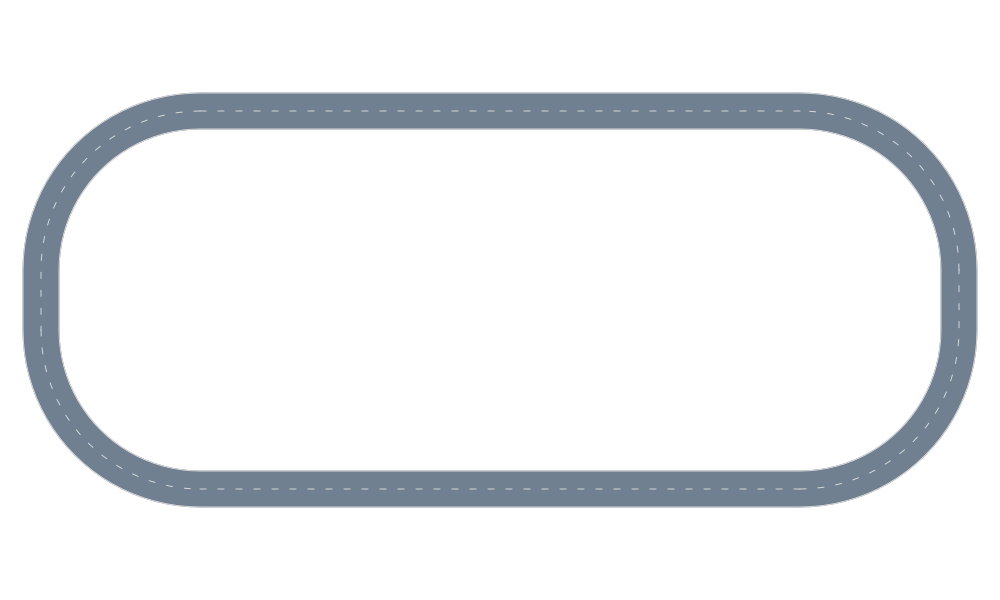

In [4]:
roadway = gen_stadium_roadway(2)
render([roadway], camera=StaticCamera(position=(50,30), zoom=6.))

The `Roadway` object can be directly passed to the `render` function in the list of renderable objects. 
The camera argument is used to center the camera and make the roadway fit in the canvas. See the camera section for more information.

Now let's add vehicles.

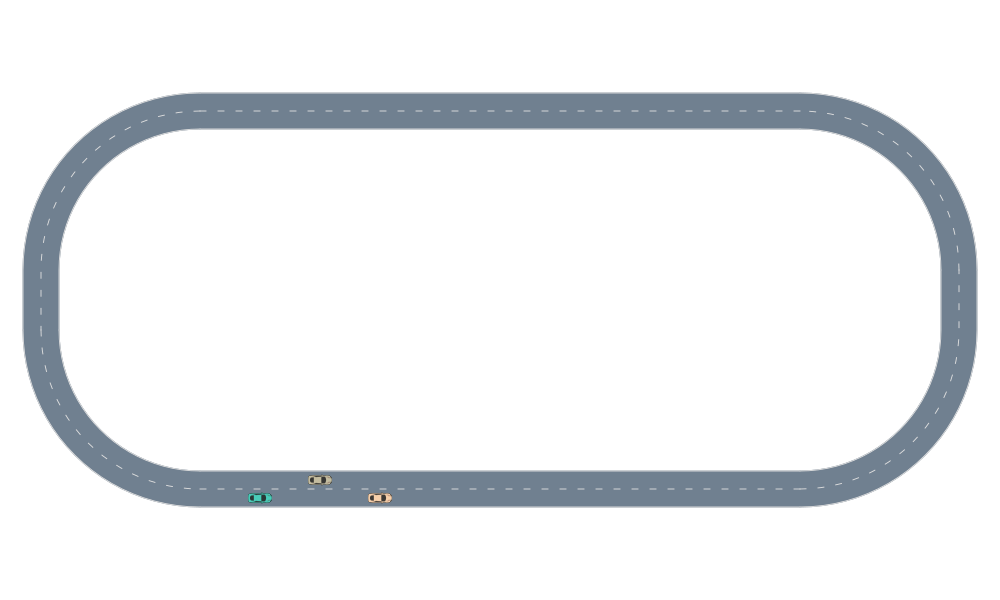

In [5]:
# see AutomotiveDrivingModels doc for creating vehicles
veh1 = Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0+randn()), 
                    VehicleDef(), 1)
veh2 = Vehicle(VehicleState(VecSE2(20.0,0.0,0.0), roadway, 29.0+randn()), 
                    VehicleDef(), 2)
veh3 = Vehicle(VehicleState(VecSE2(30.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0+randn()), 
                    VehicleDef(), 3)

scene = Frame([veh1, veh2, veh3])

render([roadway, scene], camera=StaticCamera(position=(50,30), zoom=6.))

As the scene is passed after the roadway, the vehicle are rendered on top of the roadway. 

One can also render a single vehicle.

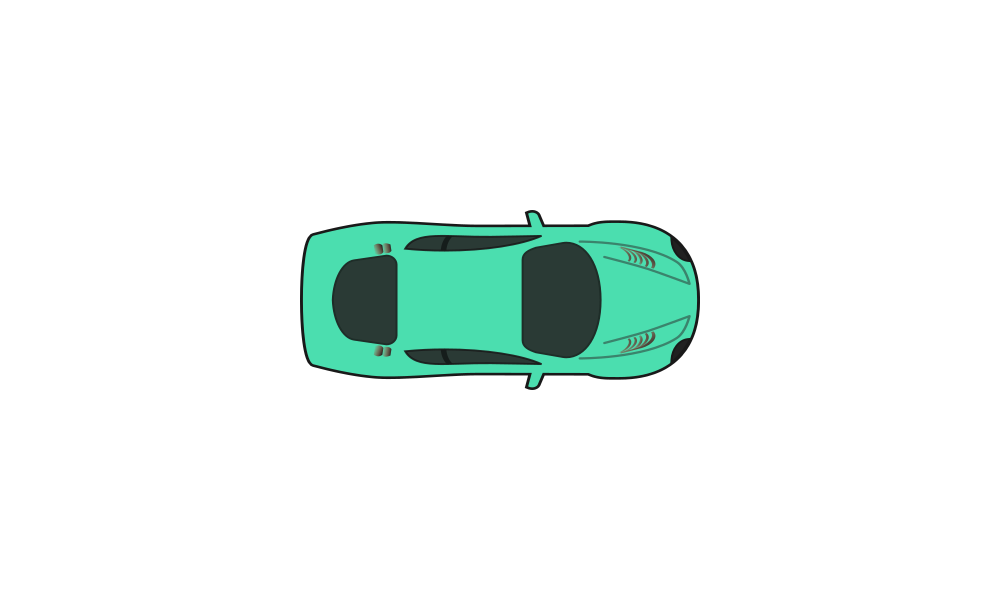

In [6]:
render([veh1], camera=StaticCamera(position=(10.,-3.),zoom=100.))

**Controlling the appearance of the vehicles**

By defautl, the vehicles are rendered in "fancy" mode and are assigned with a random color. 

To specify the appearance of a vehicle, you can use one of the following wrappers: `FancyCar` (default), `ArrowCar`, `EntityRectangle`.

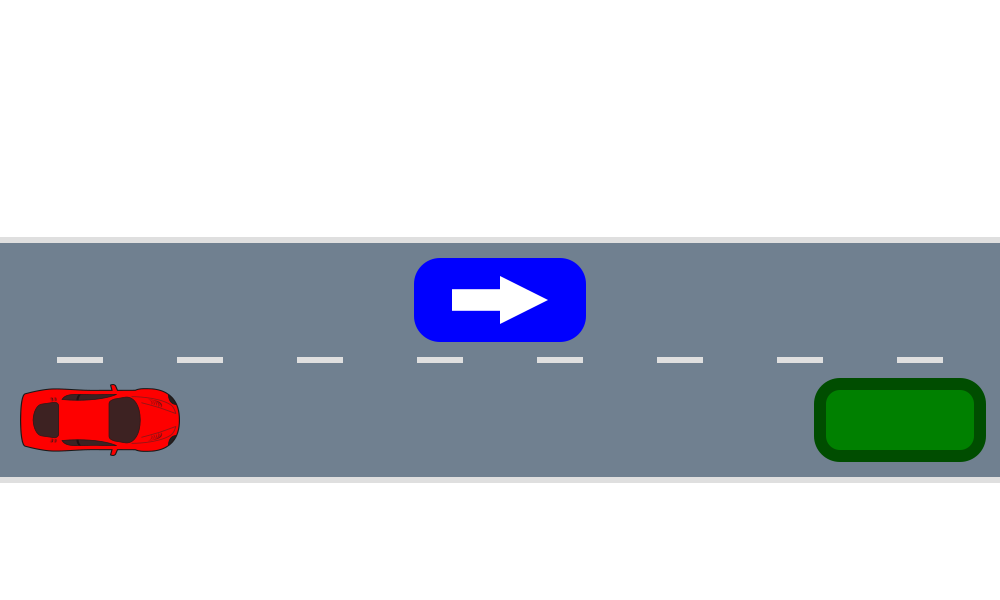

In [7]:
render([roadway, FancyCar(veh1, colorant"red"), ArrowCar(veh2, colorant"blue"), EntityRectangle(veh3, colorant"green")], 
        camera=StaticCamera(position=(20,0), zoom=40.))

## Cameras

Cameras are useful to modify the zoom or move the content on the canvas. AutoViz provide some useful camera types to create different focus effect: `StaticCamera` ,`TargetFollowCamera`, `SceneFollowCamera`.
The camera objects in AutoViz describe a camera behavior. 
This behavior takes effect when calling the function `update_camera!` prior to the `render` function.

You can also implement your own camera (see the camera section of the doc).

**Static Camera**: pass in the position of the center (in world coordinate), and a zoom factor (in pix/m) 

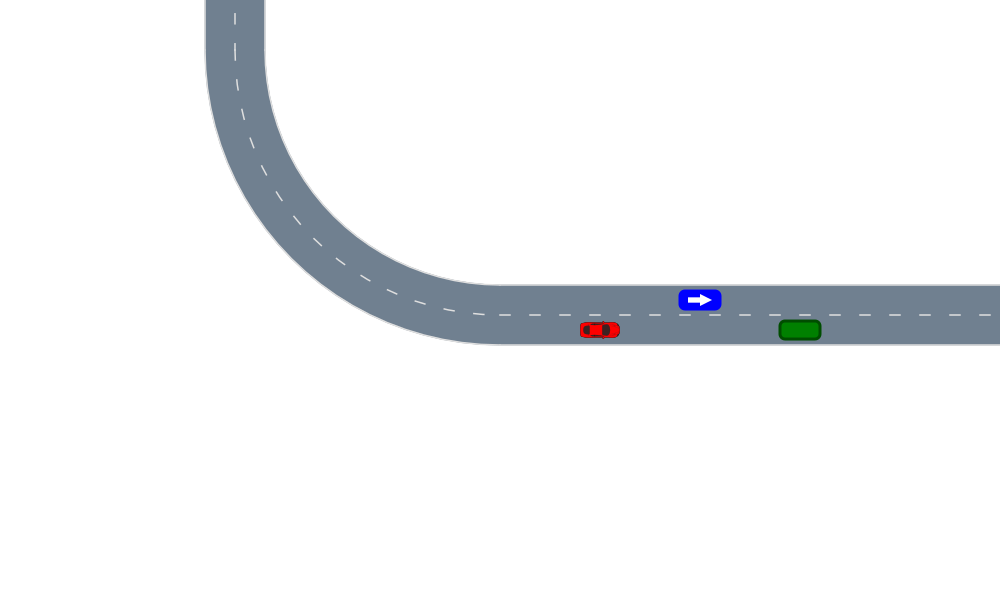

In [8]:
render([roadway, FancyCar(veh1, colorant"red"), ArrowCar(veh2, colorant"blue"), EntityRectangle(veh3, colorant"green")], 
        camera=StaticCamera(position=(0,0.), zoom=10.))

The other cameras adapts their position depending on the the scene. 

The function `update_camera!(::Camera, ::Frame)` can be called to update the position of a camera.


**Target Follow Camera**: pass in the ID of a vehicle and a zoom level, the camera will automatically center the canvas on the vehicle.

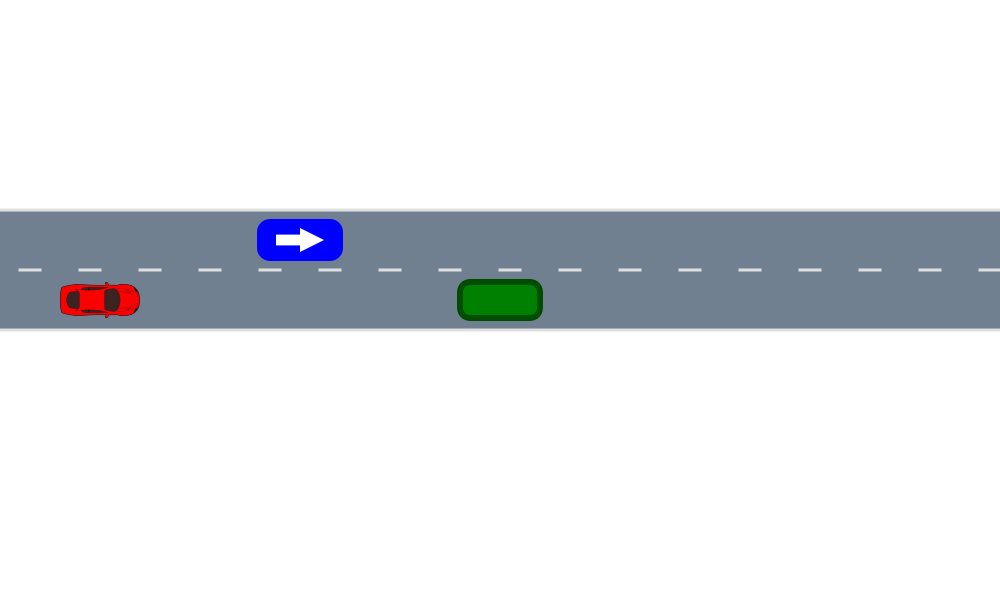

In [14]:
# the camera is centered on the green car (id=3)
cam = TargetFollowCamera(3, zoom=20.)
update_camera!(cam, scene)
render([roadway, FancyCar(veh1, colorant"red"), ArrowCar(veh2, colorant"blue"), EntityRectangle(veh3, colorant"green")], 
        camera=cam)

**Scene Follow Camera:** the camera is centered over all the vehicle present in the scene when `update_camera!` is called. Check the documentation for more details on the constructor options.

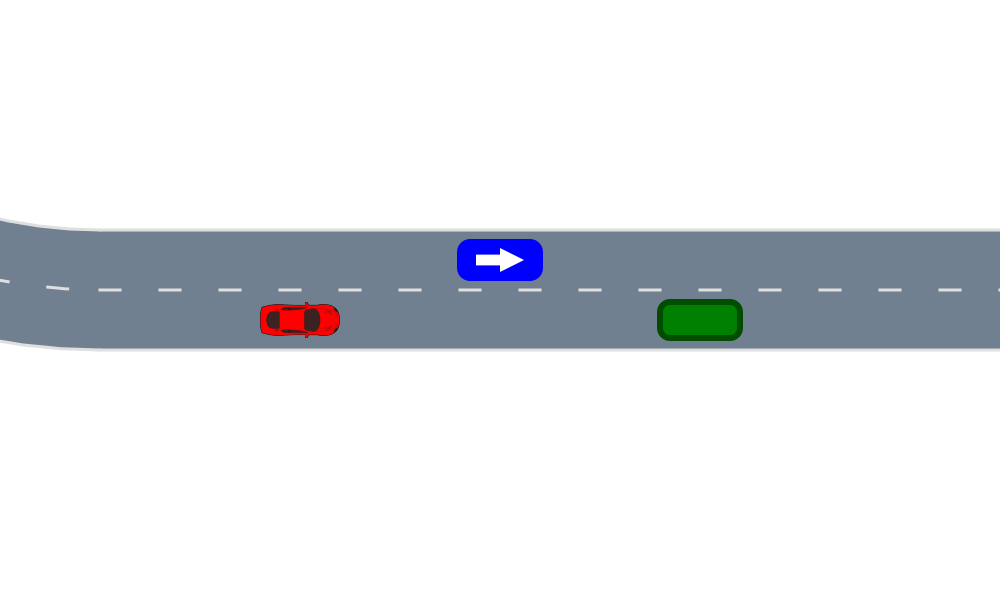

In [15]:
cam = SceneFollowCamera(zoom=20.)
update_camera!(cam, scene)
render([roadway, FancyCar(veh1, colorant"red"), ArrowCar(veh2, colorant"blue"), EntityRectangle(veh3, colorant"green")], 
        camera=cam)

AutoViz.jl also provides `ZoomingCamera` and `ComposedCamera`, check the documentation to learn more about these. 

## Overlays

Renderable objects passed to the `render` function are rendered in the order you passed them in, that is if we pass `roadway` and then `scene`, the roadway is rendered first, and the scene is rendered on top of the roadway. 
This behavior leaves the possibility to create overlays. Overlays are renderable objects that usually add some information on top of what is already rendered. 
The most basic usage is to display text, or the ID of each vehicle. 

By changing the order of the vector of renderable you can also create "underlay", like highlighting a lane below a vehicle. 

## Animations

## Creating your own renderables

## Color themes